In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

/home/emqaclh/.local/share/virtualenvs/shortest_path-HZF5jUBe/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
from pyrosm import OSM

In [3]:
osm = OSM('../data/protobuf/toy_osm.osm.pbf')

In [4]:
df = osm.get_buildings()

In [5]:
%%capture
positions = np.transpose(np.array([df.geometry.centroid.x, df.geometry.centroid.y]))
positions = np.radians(positions)

In [6]:
center_point = np.mean(positions, axis=0)

In [7]:
center_point = np.radians(center_point)

In [8]:
dlon = positions[:,0] - center_point[0]
dlat = positions[:,1] - center_point[1]

In [9]:
a = np.sin(dlat/2.0)**2 + np.cos(positions[:,1]) * np.cos(center_point[1]) * np.sin(dlon/2.0)**2

In [10]:
a = (a - np.min(a)) / (np.max(a) - np.min(a))

In [11]:
a = a + ((np.random.rand(len(a)) * 2) - 1) / 80

In [12]:
a = (a - np.min(a)) / (np.max(a) - np.min(a))

In [13]:
df['example_column'] = a

<AxesSubplot:>

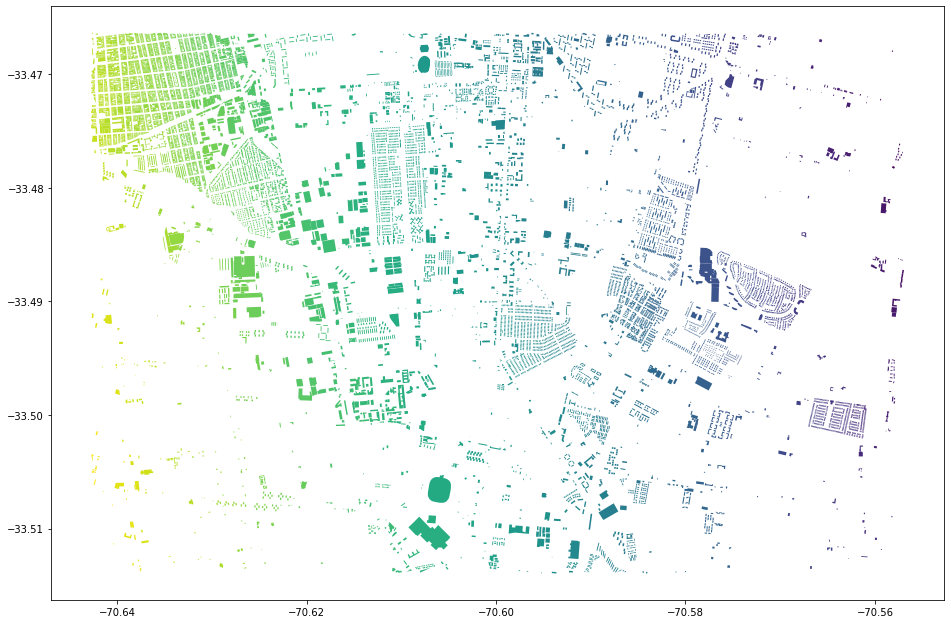

In [14]:
df.plot(figsize=(16, 12), column='example_column')

In [23]:
df = df.loc[:, ['example_column', 'geometry']].copy()

In [25]:
imputer = GeoImputer(df)

In [27]:
imputer.geodf.centroid

/tmp/ipykernel_20917/1530524234.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  imputer.geodf.centroid


0        POINT (-70.57786 -33.48599)
1        POINT (-70.57687 -33.48938)
2        POINT (-70.60747 -33.46647)
3        POINT (-70.60693 -33.51047)
4        POINT (-70.57533 -33.47063)
                    ...             
13444    POINT (-70.56466 -33.47669)
13445    POINT (-70.59748 -33.46709)
13446    POINT (-70.60395 -33.48912)
13447    POINT (-70.62032 -33.50618)
13448    POINT (-70.60589 -33.50653)
Length: 13449, dtype: geometry

In [28]:
pos = [[-70.57786, -33.48599], [-70.57687, -33.48938]]

In [31]:
distances, indexes = imputer.tree.query(pos, k=3)

In [42]:
from shapely.geometry import Point

In [45]:
indexes

array([[    0, 13435,  4762],
       [    1,    13,  4760]])

In [49]:
imputer.geodf.loc[indexes[0], 'geometry'].contains(Point(pos[0])).values

array([ True, False, False])

In [30]:
vals = np.array([
    [15, 8, 20],
    [25, 9, 7],
    [42, 36, 84]
])

containing = np.array([
    [False, False, False],
    [False, True, True],
    [False, False, True]
])

In [31]:
imput_index = np.where(containing.sum(axis=1) > 0, containing.argmax(axis=1), -1)

In [34]:
imput_values = np.full(vals.shape[0], np.nan)

In [36]:
for i, imput_i in enumerate(imput_index):
    if imput_i > -1:
        imput_values[i] = vals[i][imput_i]
    else:
        imput_values[i] = vals[i].mean()

In [37]:
imput_values

array([14.33333333,  9.        , 84.        ])

In [28]:
np.where(imput_index > -1, vals[imput_index], vals[imput_index].mean())

array([[40.55555556, 36.        , 84.        ],
       [40.55555556,  9.        ,  7.        ],
       [40.55555556, 36.        , 84.        ]])

In [13]:
containing.argmax(axis=1)

array([0, 1, 0])

In [5]:
containing

array([[False, False, False],
       [False,  True, False],
       [False,  True,  True]])

In [4]:
vals

array([[15,  8, 20],
       [25,  9,  7],
       [42, 36, 84]])